# Transform the `result.csv` into a LaTeX table

In [1]:
import pandas as pd

# Load the CSV file with UTF-8 encoding
df = pd.read_csv('result.csv', encoding='utf-8')

# Define the data orders and algorithms
data_orders = df['Data Order'].unique()
algorithms = df['Algorithm'].unique()
data_sizes_1 = [10000, 30000, 50000]
data_sizes_2 = [100000, 300000, 500000]

# Function to generate LaTeX table for a given data order and data sizes
def generate_latex_table(data_order, data_sizes):
    latex = "\\begin{table}[H]\n\\centering\n\\resizebox{\\columnwidth}{!}{%\n\\begin{tabular}{|ccccccc|}\n\\hline\n"
    latex += f"\\multicolumn{{7}}{{|c|}}{{Data Order: {data_order}}} \\\\ \\hline\n"
    latex += "\\multicolumn{1}{|c|}{\\textbf{Data size}} & " + " & ".join([f"\\multicolumn{{2}}{{c|}}{{{size}}}" for size in data_sizes]) + " \\\\ \\hline\n"
    latex += "\\multicolumn{1}{|c|}{\\textbf{Resulting statics}} & " + " & ".join(["\\multicolumn{1}{c|}{Running time} & \\multicolumn{1}{c|}{Comparisons}"] * len(data_sizes)) + " \\\\ \\hline\n"
    
    for algorithm in algorithms:
        latex += f"\\multicolumn{{1}}{{|c|}}{{{algorithm.replace('-', ' ').title()}}} "
        for size in data_sizes:
            row = df[(df['Data Order'] == data_order) & (df['Algorithm'] == algorithm) & (df['Data Size'] == size)]
            if not row.empty:
                running_time = row['Running Time (ms)'].values[0]
                comparisons = int(row['Comparisons'].values[0])
                latex += f"& \\multicolumn{{1}}{{c|}}{{{running_time}}} & \\multicolumn{{1}}{{c|}}{{{comparisons}}} "
            else:
                latex += "& \\multicolumn{1}{c|}{} & \\multicolumn{1}{c|}{} "
        latex += "\\\\ \\hline\n"
    
    latex += "\\end{tabular}%\n}\n"
    latex += f"\\caption{{Kết quả thực nghiệm cho mảng có Data Order: {data_order}, Data Size: {', '.join(map(str, data_sizes))}}}\n"
    latex += f"\\label{{tab:{data_order.replace(' ', '_').lower()}_{'_'.join(map(str, data_sizes))}}}\n"
    latex += "\\end{table}\n\n"
    return latex

# Generate LaTeX tables for each data order
latex_tables = []
for i, order in enumerate(data_orders):
    latex_tables.append(generate_latex_table(order, data_sizes_1))
    latex_tables.append(generate_latex_table(order, data_sizes_2))

# Save the LaTeX tables to a file with UTF-8 encoding
with open('result_tables.tex', 'w', encoding='utf-8') as f:
    for table in latex_tables:
        f.write(table)

# Data analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('./style.mplstyle')

from pathlib import Path

IMAGE_PATH = Path() / "images"
IMAGE_PATH.mkdir(parents = True, exist_ok = True)

def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
  path = IMAGE_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format = fig_extension, dpi = resolution)

In [3]:
df = pd.read_csv('result.csv', encoding='utf-8')


data_orders = df['Data Order'].unique()
algorithms = df['Algorithm'].unique()
data_sizes = df['Data Size'].unique()

colors = ["red", "green", "blue",  "olive", "black", "darkcyan", "pink", "purple", "orange", "brown", "magenta"]

## Running Time

In [4]:
def plot_running_time(data_order_, data_sizes_, algorithms_, colors_, fig_name = ''):
    plt.figure(figsize=(12, 8))
    for algorithm, color in zip(algorithms_, colors_):
        running_times = []
        for size in data_sizes_:
            row = df[(df['Data Order'] == data_order_) & (df['Algorithm'] == algorithm) & (df['Data Size'] == size)]
            if not row.empty:
                running_times.append(row['Running Time (ms)'].values[0])
            else:
                running_times.append(None)
        plt.plot(data_sizes_, running_times, marker='o', linestyle='-', color=color, label=algorithm.replace('-', ' ').title())
    
    plt.title(f"Running Time for {data_order_} Data Order" if not fig_name else fig_name)
    plt.xlabel("Data Size")
    plt.ylabel("Running Time (ms)")
    plt.legend()
    plt.grid(True)
    save_fig(f"{data_order_.lower().replace(' ', '_')}_running_time" if not fig_name else fig_name.lower().replace(' ', '_'))
    plt.show()

### 1. Randomize

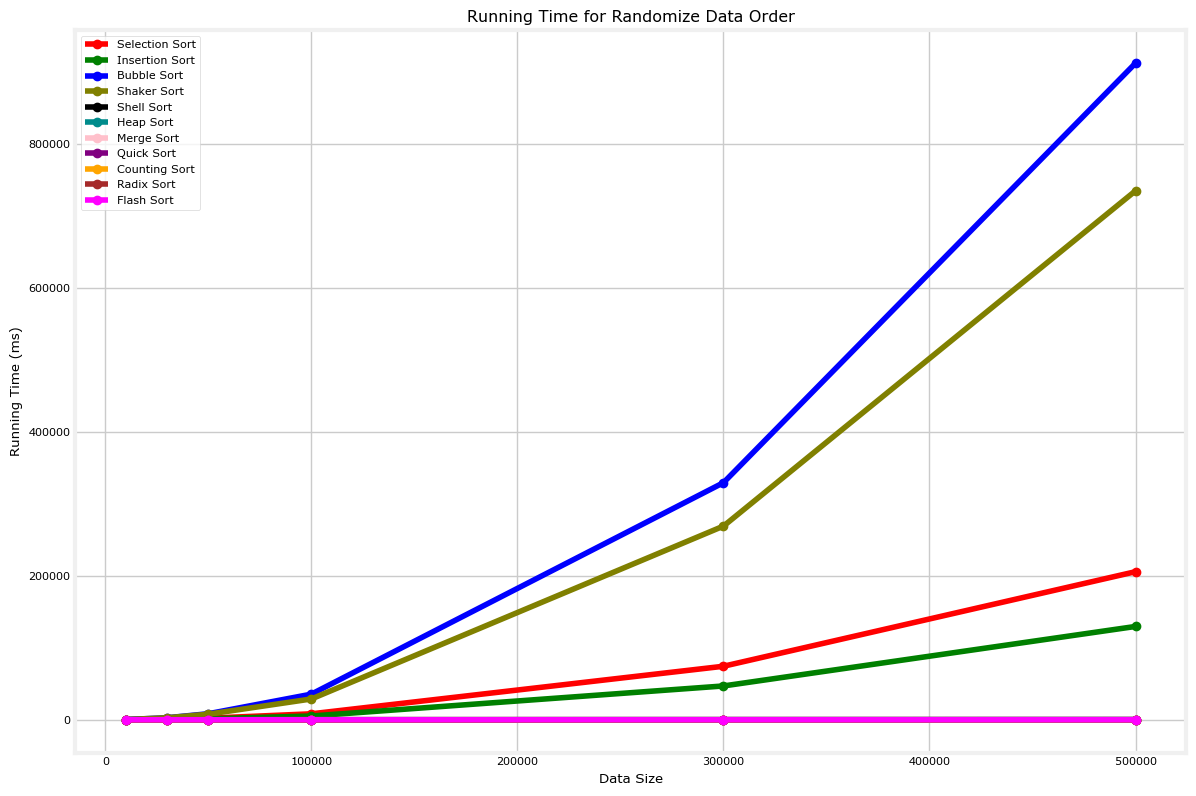

In [5]:
plot_running_time("Randomize", data_sizes, algorithms, colors)

Remove Bubble, Shaker, Selection, Insertion

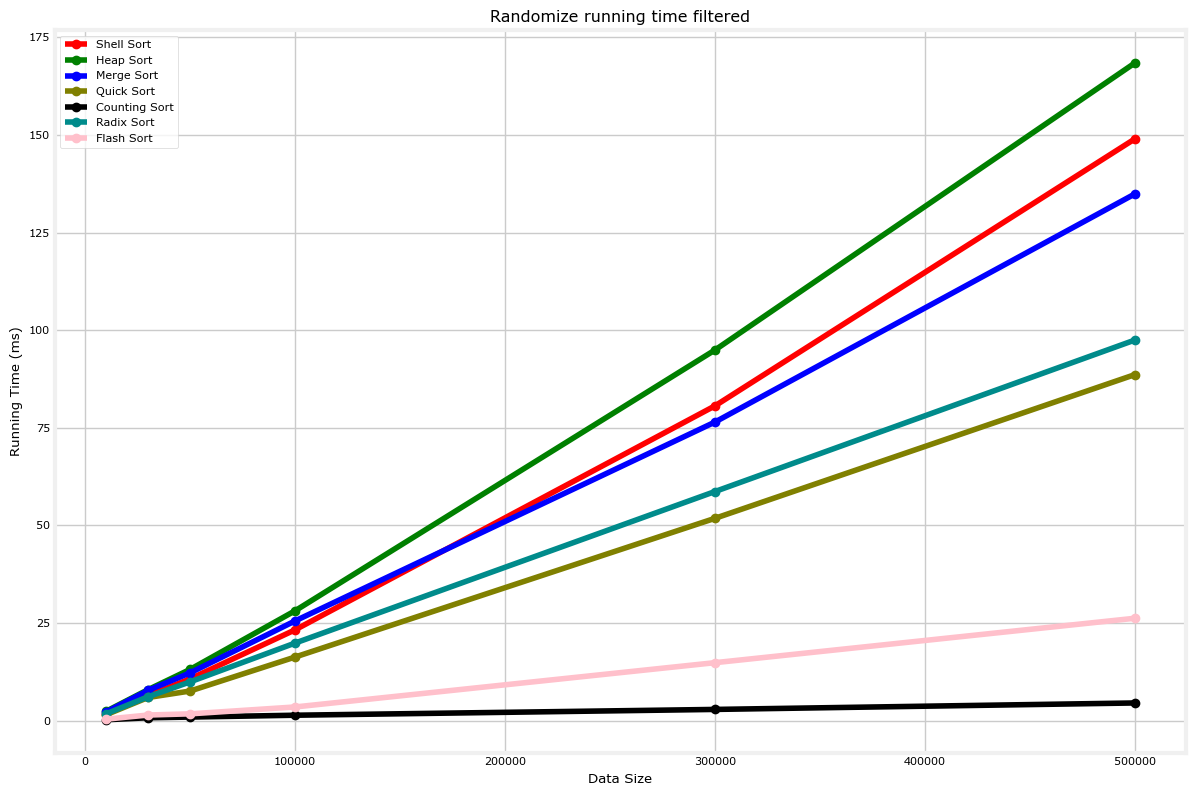

In [6]:
excluded_algorithms = ['bubble-sort', 'shaker-sort', 'selection-sort', 'insertion-sort']
filtered_algorithms = [algorithm for algorithm in algorithms if algorithm not in excluded_algorithms]
plot_running_time("Randomize", data_sizes, filtered_algorithms, colors, "Randomize running time filtered")

### 2. Nearly sorted

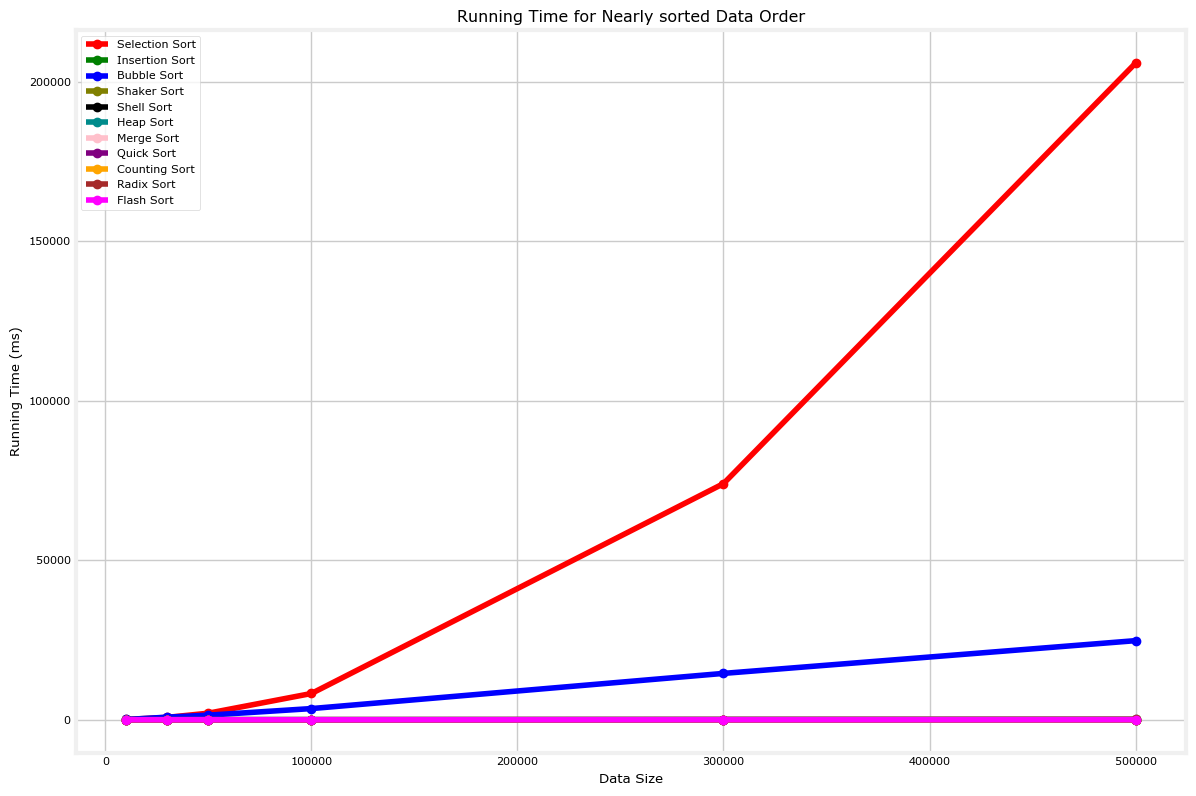

In [7]:
plot_running_time("Nearly sorted", data_sizes, algorithms, colors)

Remove Bubble, Selection

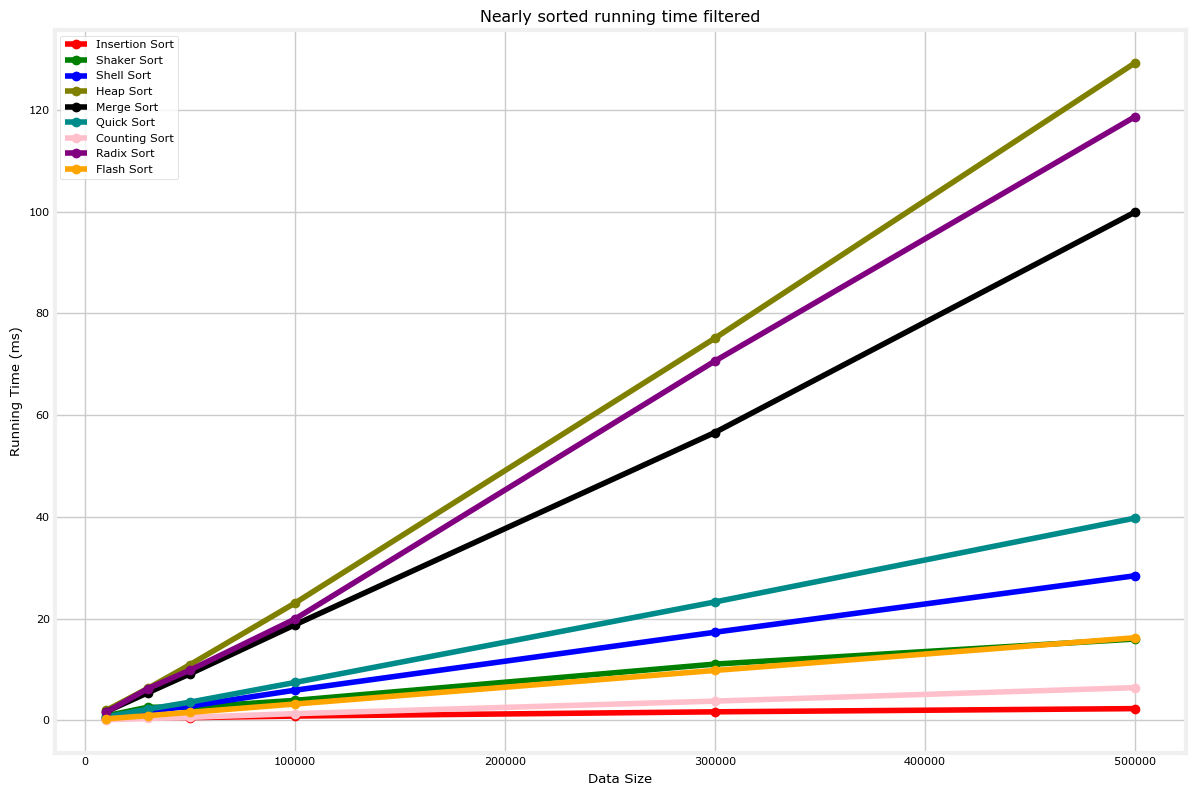

In [8]:
excluded_algorithms = ['bubble-sort', 'selection-sort']
filtered_algorithms = [algorithm for algorithm in algorithms if algorithm not in excluded_algorithms]
plot_running_time("Nearly sorted", data_sizes, filtered_algorithms, colors, "Nearly sorted running time filtered")

### 3. Sorted

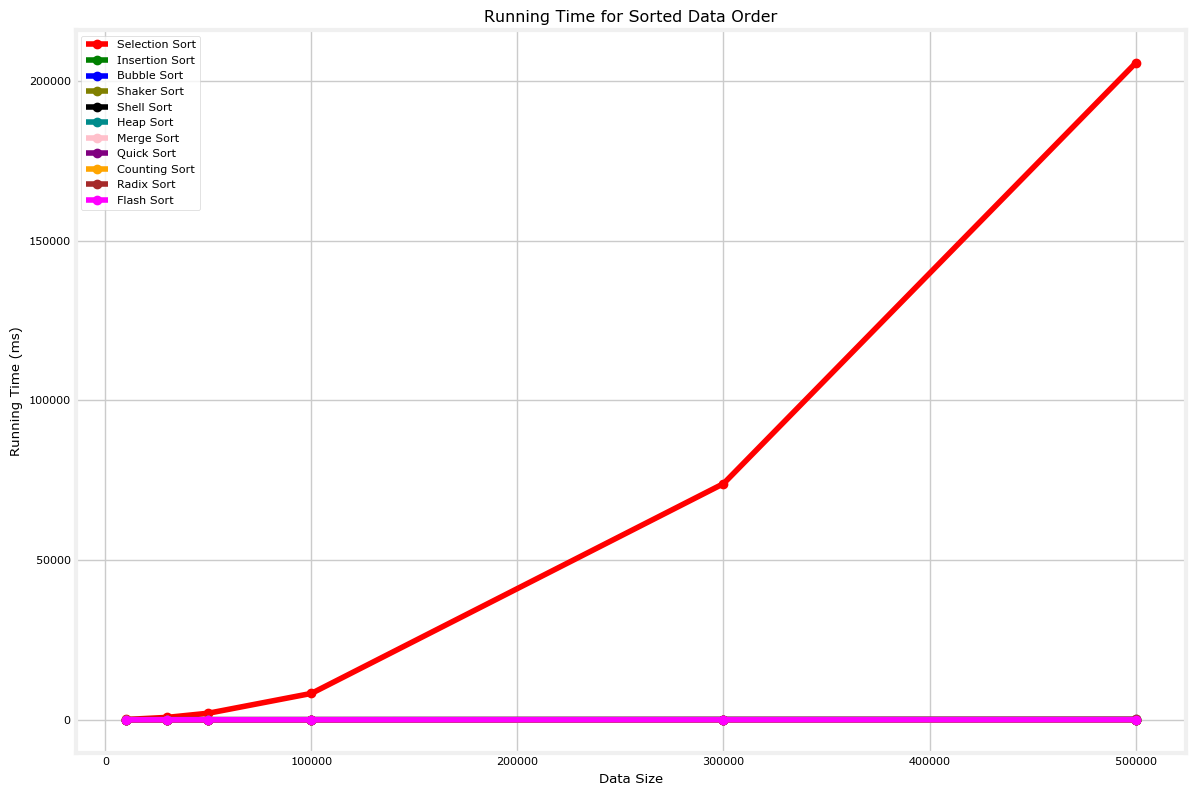

In [9]:
plot_running_time("Sorted", data_sizes, algorithms, colors)

Remove Selection

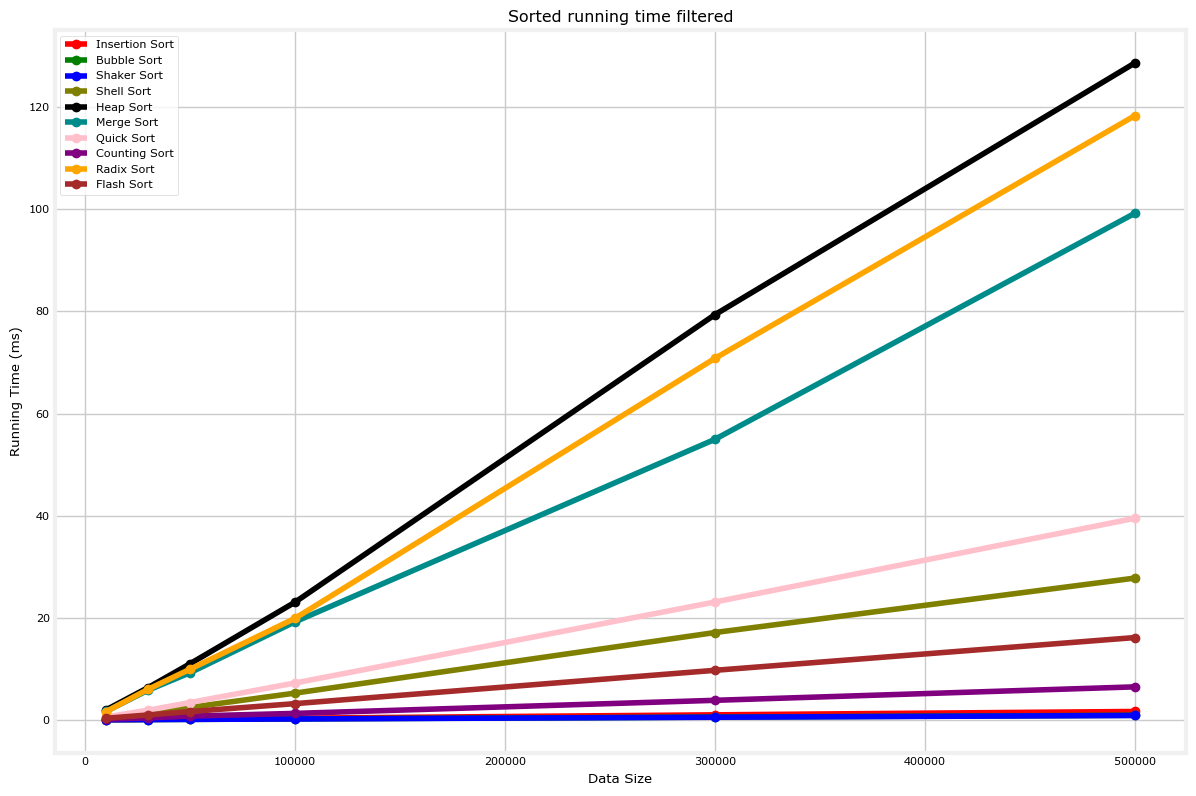

In [10]:
excluded_algorithms = ['selection-sort']
filtered_algorithms = [algorithm for algorithm in algorithms if algorithm not in excluded_algorithms]
plot_running_time("Sorted", data_sizes, filtered_algorithms, colors, "Sorted running time filtered")

### 4. Reversed

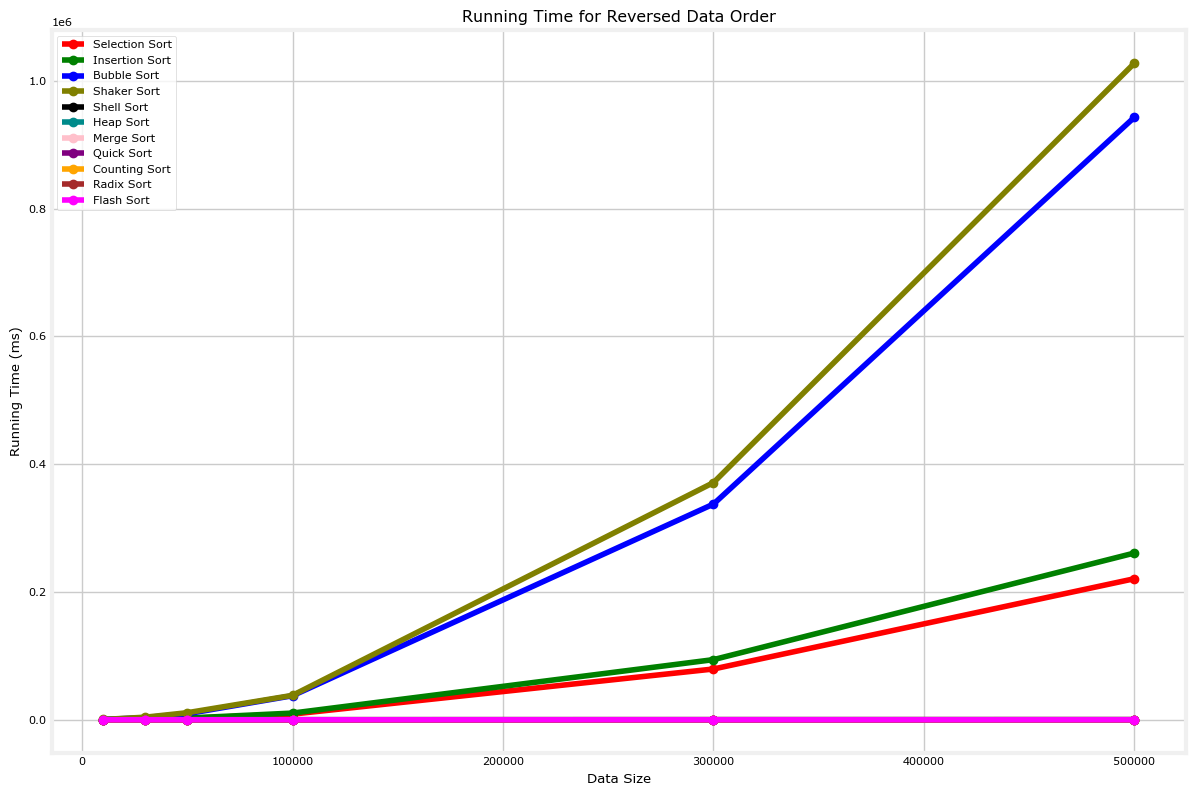

In [11]:
plot_running_time("Reversed", data_sizes, algorithms, colors)

Remove selection sort

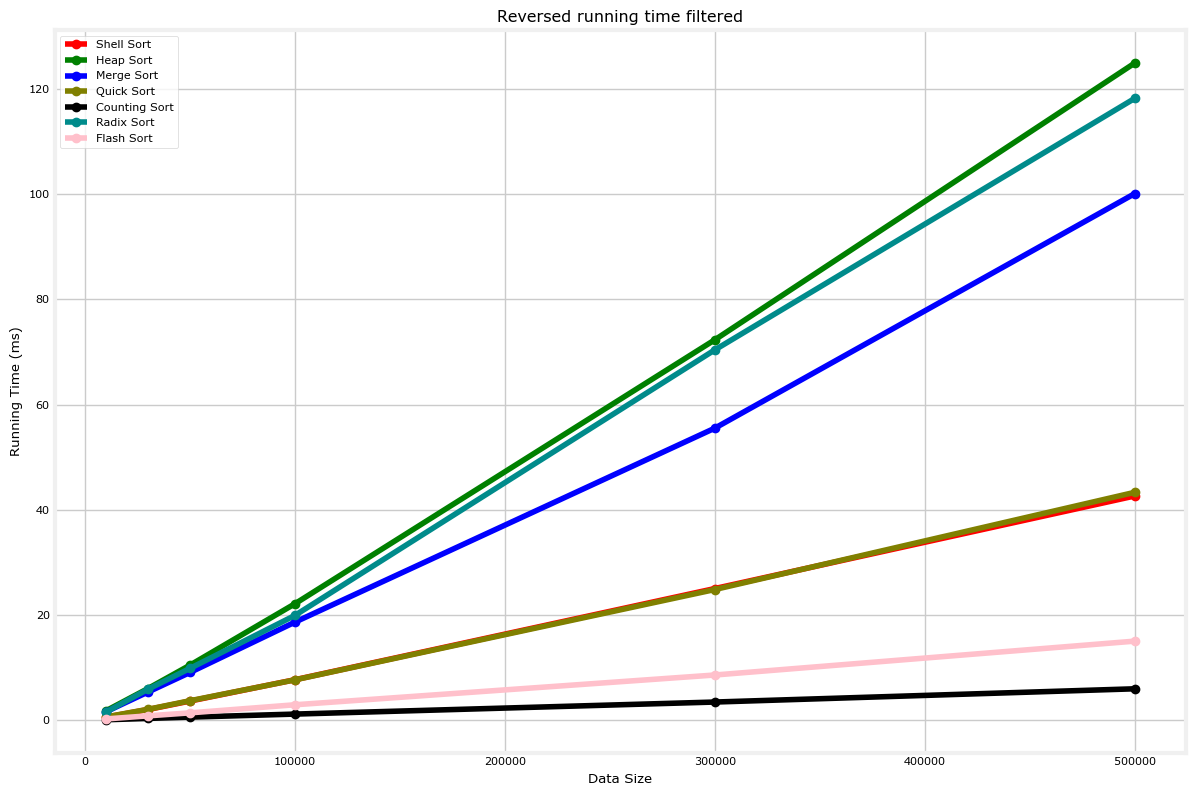

In [12]:
excluded_algorithms = ['selection-sort', 'bubble-sort', 'shaker-sort', 'insertion-sort']
filtered_algorithms = [algorithm for algorithm in algorithms if algorithm not in excluded_algorithms]
plot_running_time("Reversed", data_sizes, filtered_algorithms, colors, "Reversed running time filtered")

## Comparison

In [13]:
def plot_comparison(data_order_, data_sizes_, algorithms_, colors_, fig_name = ''):
    plt.figure(figsize=(12, 8))
    bar_width = 0.1
    index = range(len(algorithms_))
    
    for i, (size, color) in enumerate(zip(data_sizes_, colors_)):
        comparisons = []
        for algorithm in algorithms_:
            row = df[(df['Data Order'] == data_order_) & (df['Algorithm'] == algorithm) & (df['Data Size'] == size)]
            if not row.empty:
                comparisons.append(row['Comparisons'].values[0])
            else:
                comparisons.append(0)
        plt.bar([p + bar_width * i for p in index], comparisons, bar_width, color=color, label=f'Data Size {size}')
    
    plt.title(f"Comparisons for {data_order_} Data Order" if not fig_name else fig_name)
    plt.xlabel("Algorithm")
    plt.ylabel("Comparisons")
    plt.xticks([p + bar_width * (len(data_sizes_) / 2) for p in index], [algorithm.replace('-', ' ').title() for algorithm in algorithms_])
    plt.legend()
    plt.grid(True)
    save_fig(f"{data_order_.lower().replace(' ', '_')}_comparisons" if not fig_name else fig_name.lower().replace(' ', '_'))
    plt.show()

### Plot all algorithms

In [14]:
def plot_comparison_for_all_algorithms(data_orders_, data_sizes_, algorithms_, colors_, fig_name = ''):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    bar_width = 0.2
    index = range(len(algorithms_))
    
    for ax, data_order_ in zip(axes, data_orders_):
        for i, (size, color) in enumerate(zip(data_sizes_, colors_)):
            comparisons = []
            for algorithm in algorithms_:
                row = df[(df['Data Order'] == data_order_) & (df['Algorithm'] == algorithm) & (df['Data Size'] == size)]
                if not row.empty:
                    comparisons.append(row['Comparisons'].values[0])
                else:
                    comparisons.append(0)
            ax.bar([p + bar_width * i for p in index], comparisons, bar_width, color=color, label=f'Data Size {size}')
        
        ax.set_title(f"Comparisons for {data_order_} Data Order")
        ax.set_xlabel("Algorithm")
        ax.set_ylabel("Comparisons")
        ax.set_xticks([p + bar_width * (len(data_sizes_) / 2) for p in index])
        ax.set_xticklabels([algorithm.replace('-', ' ').title() for algorithm in algorithms_], rotation=45, ha='right')
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    if fig_name:
        plt.suptitle(fig_name)
    save_fig(f"{'_'.join([order.lower().replace(' ', '_') for order in data_orders_])}_comparisons" if not fig_name else fig_name.lower().replace(' ', '_'))
    plt.show()

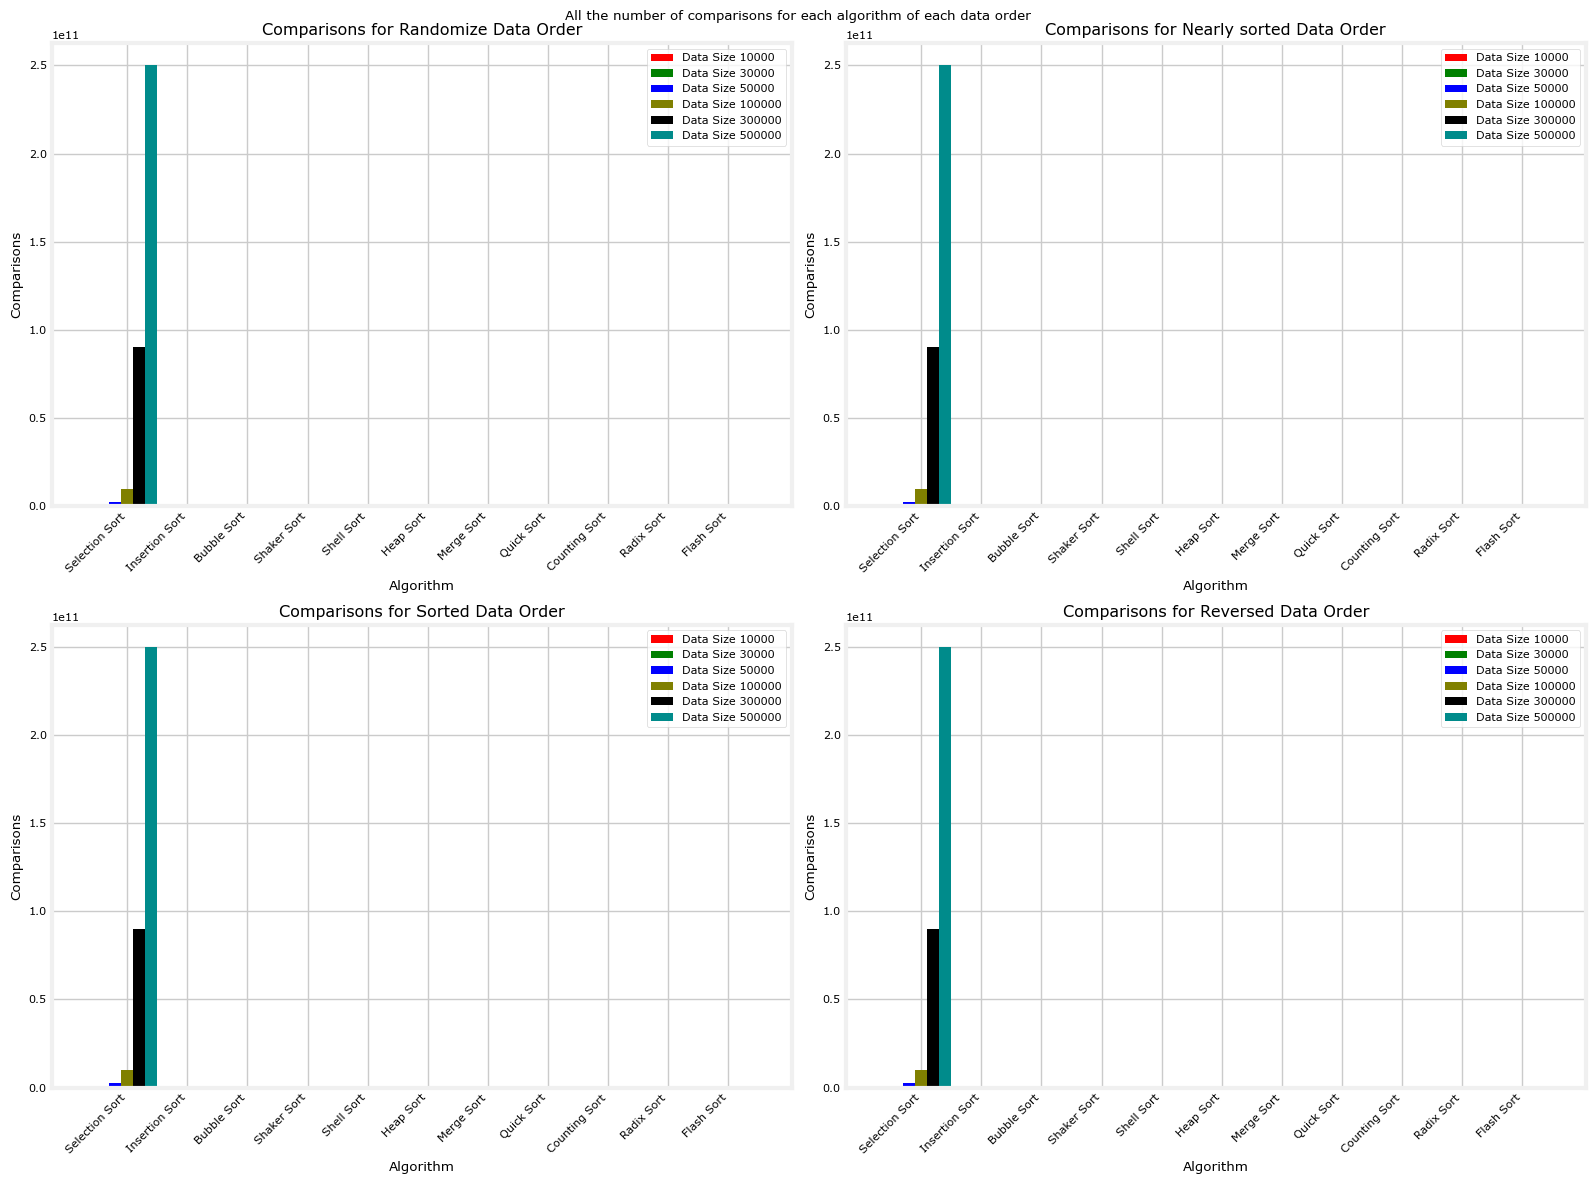

In [15]:
plot_comparison_for_all_algorithms(data_orders, data_sizes, algorithms, colors, "All the number of comparisons for each algorithm of each data order")

Grouping 10 algoithms into 3 group

In [16]:
algo_group_1 = ["insertion-sort", "bubble-sort", "shaker-sort"]
algo_group_2 = ["shell-sort", "heap-sort", "merge-sort", "quick-sort"]
algo_group_3 = ["counting-sort", "radix-sort", "flash-sort"]

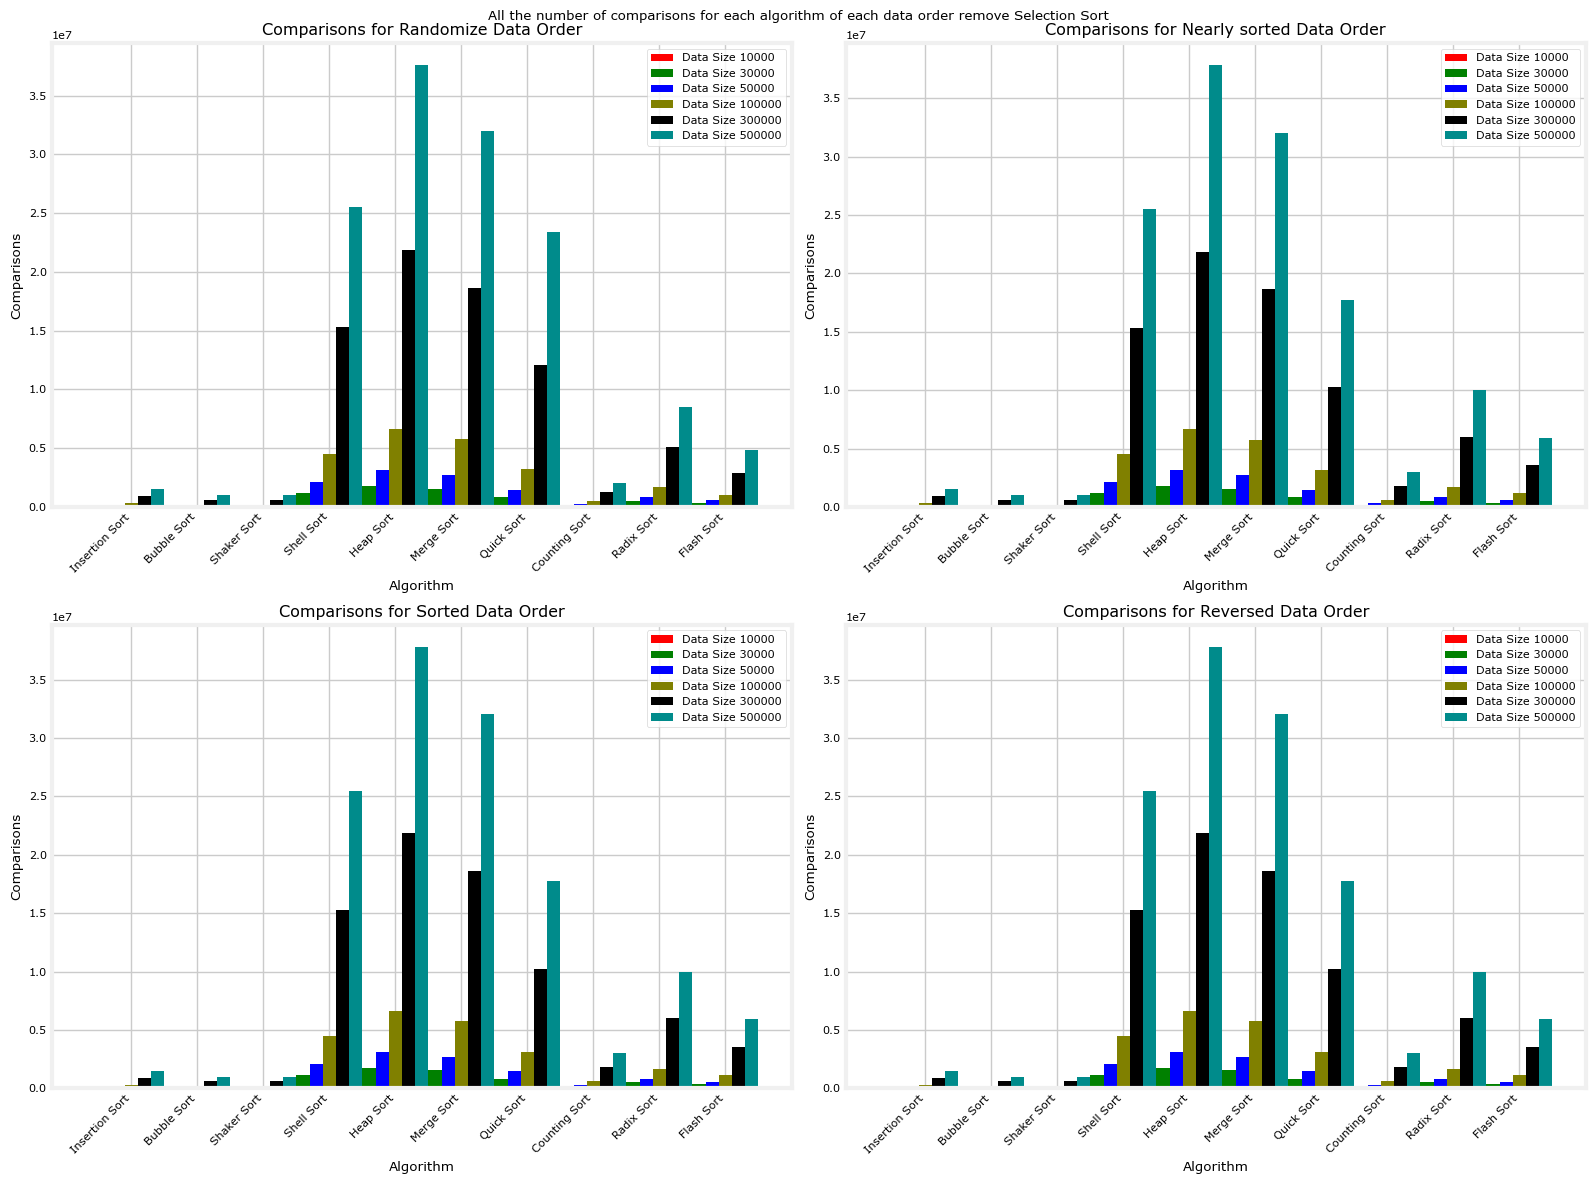

In [17]:
plot_comparison_for_all_algorithms(
    data_orders, 
    data_sizes, 
    algo_group_1 + algo_group_2 + algo_group_3, 
    colors, 
    "All the number of comparisons for each algorithm of each data order remove Selection Sort"
)

Group 1

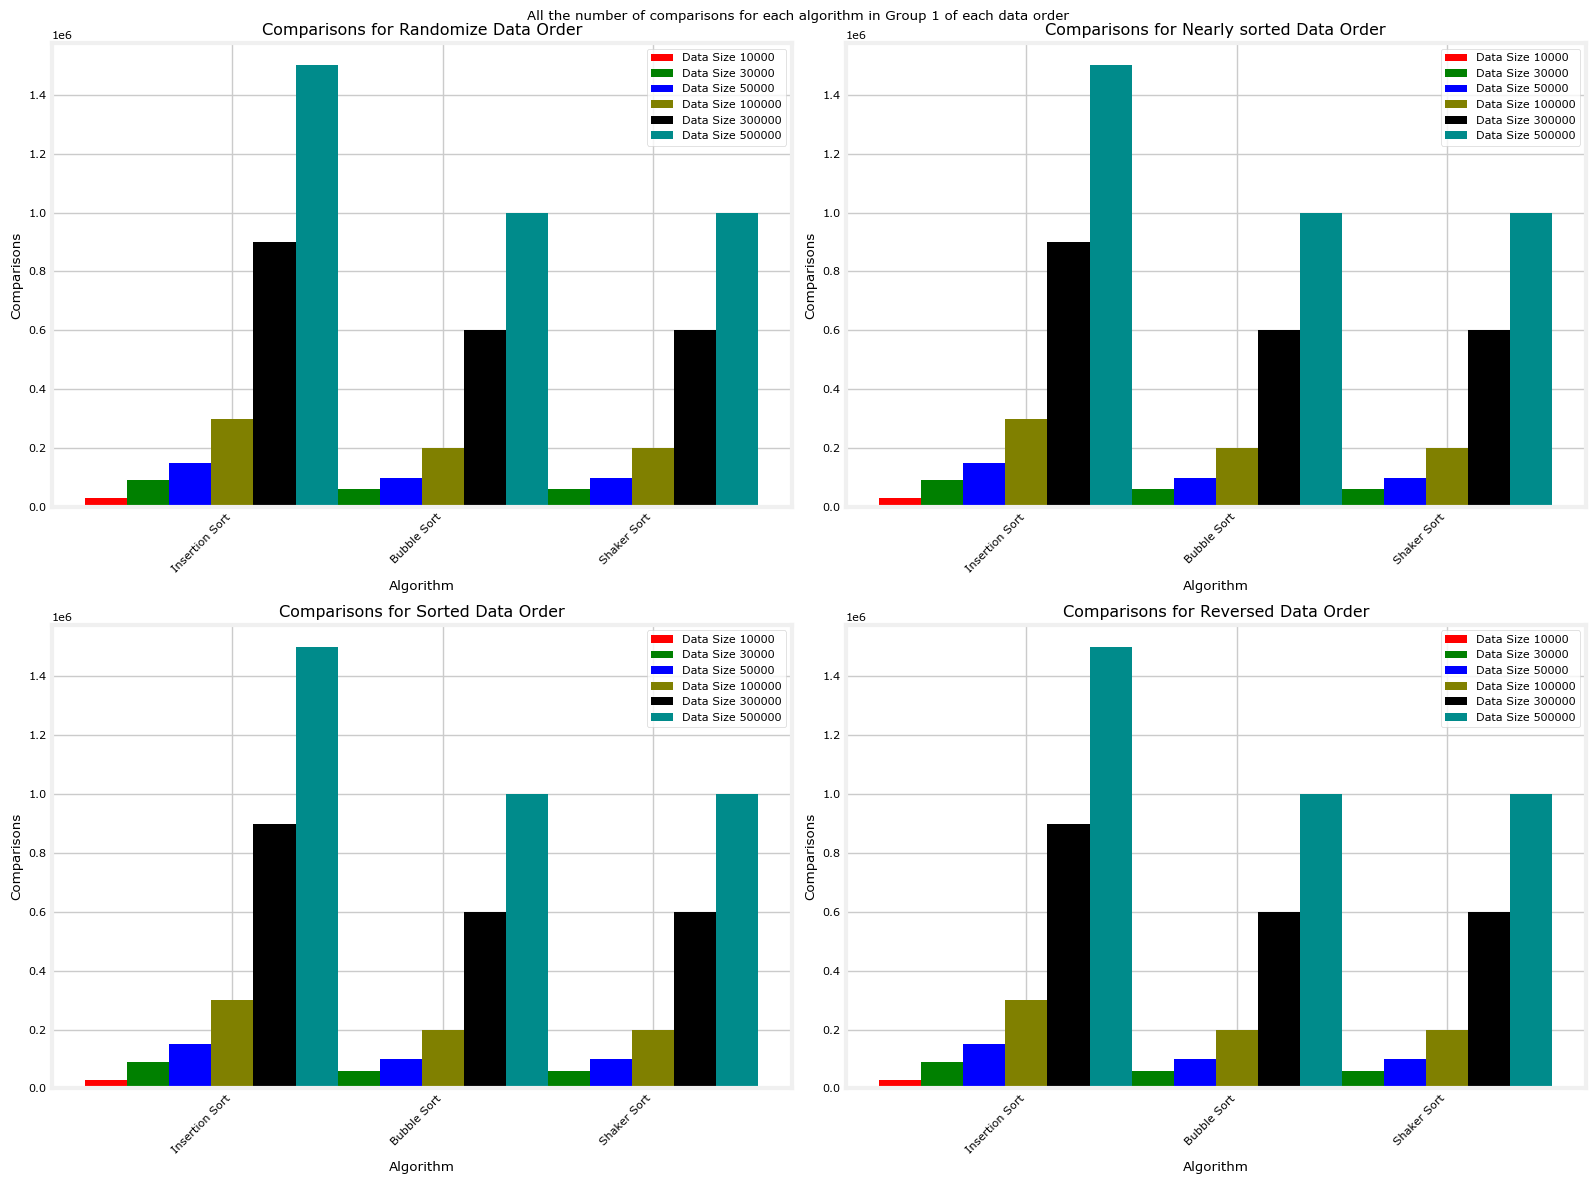

In [18]:
plot_comparison_for_all_algorithms(
    data_orders, 
    data_sizes, 
    algo_group_1, 
    colors, 
    "All the number of comparisons for each algorithm in Group 1 of each data order"
)

Group 2

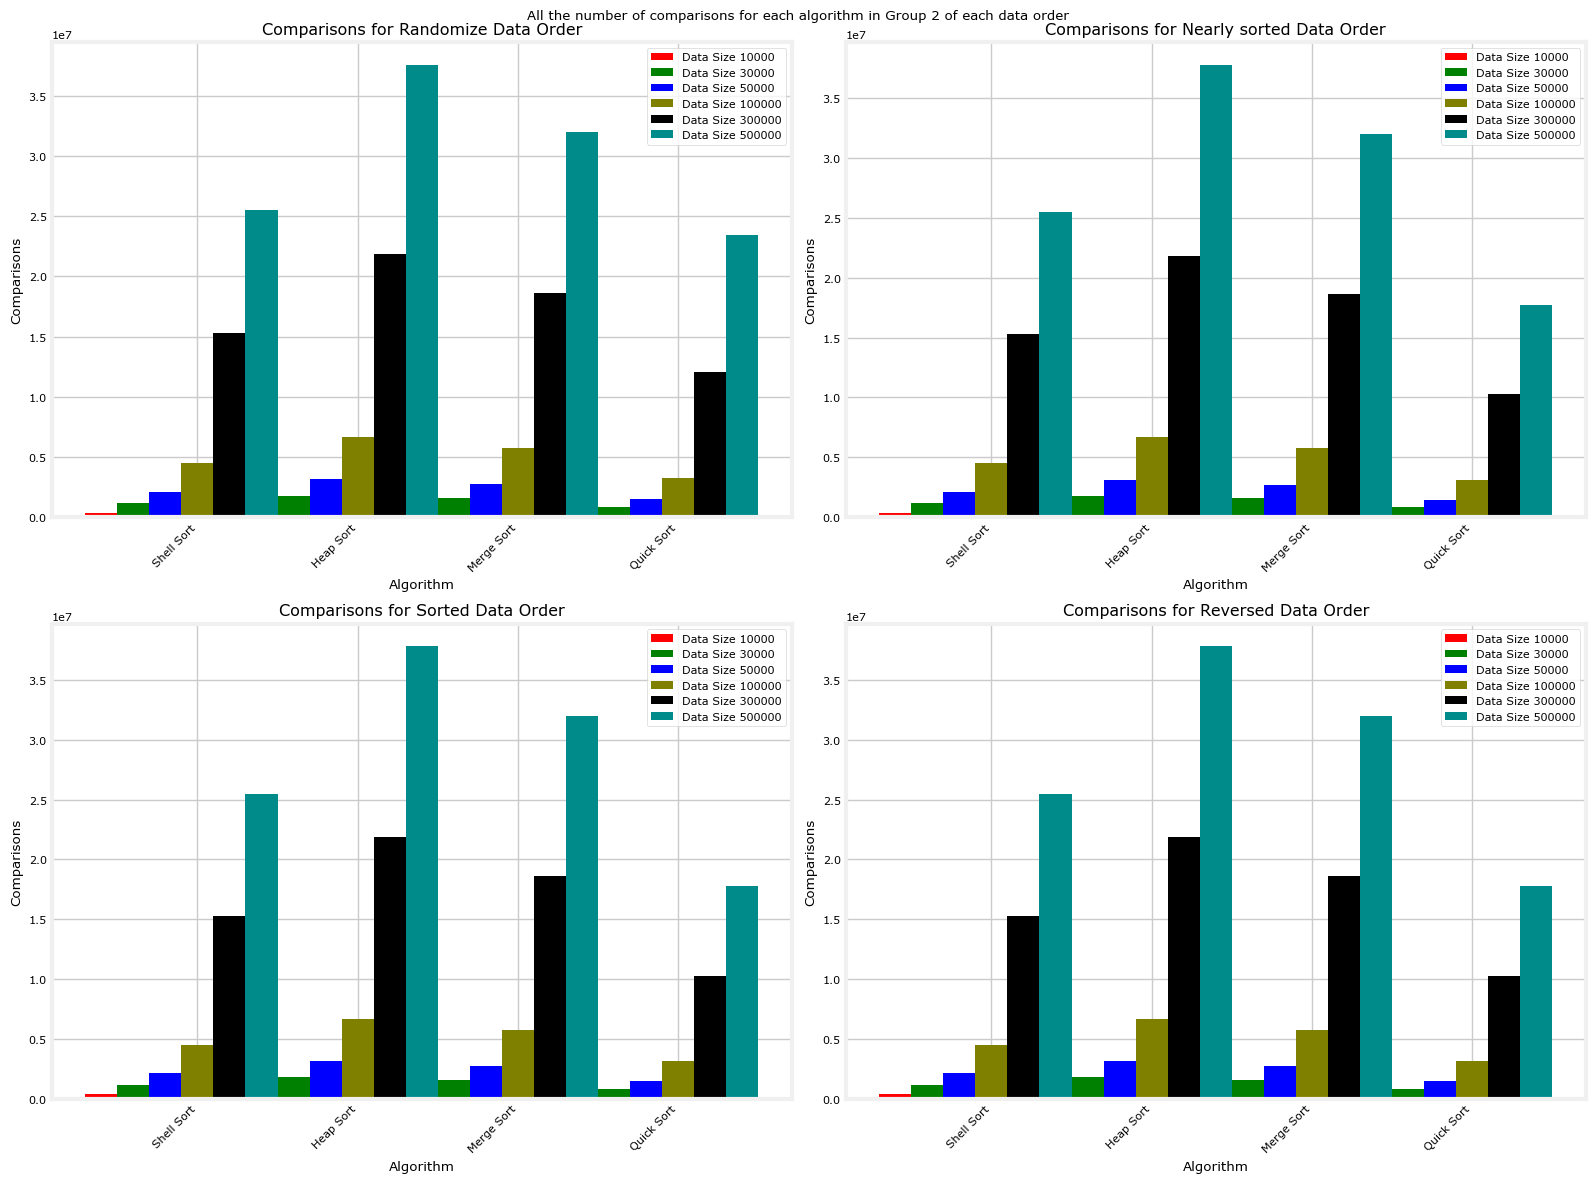

In [19]:
plot_comparison_for_all_algorithms(
    data_orders, 
    data_sizes, 
    algo_group_2, 
    colors, 
    "All the number of comparisons for each algorithm in Group 2 of each data order"
)

Group 3

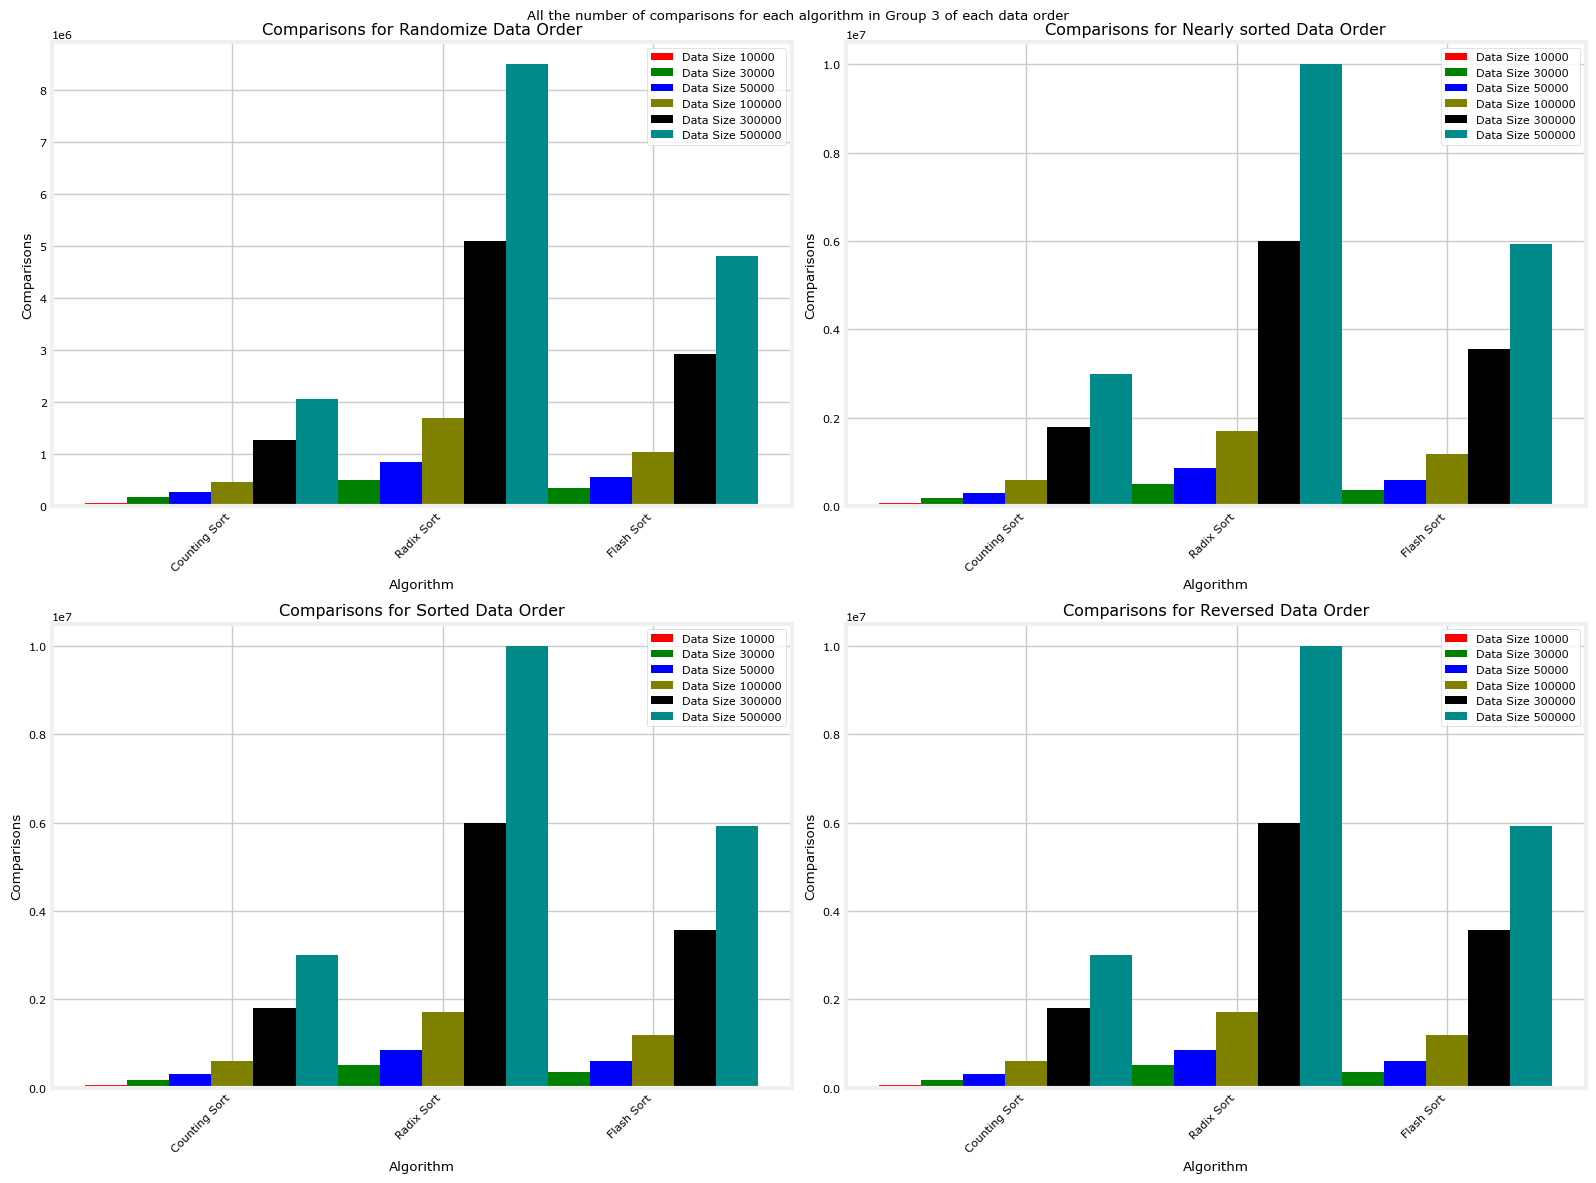

In [20]:
plot_comparison_for_all_algorithms(
    data_orders, 
    data_sizes, 
    algo_group_3, 
    colors, 
    "All the number of comparisons for each algorithm in Group 3 of each data order"
)